In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [2]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [3]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])
print(data[99])

tensor([0.4480, 1.1052, 1.2571, 1.6894, 2.3628, 2.6527, 2.9667, 3.2265, 3.5541,
        4.0256, 4.3343, 4.5296, 4.6358, 4.7628, 5.0568, 5.3415, 5.5335, 5.8225,
        5.9779, 6.2832])
tensor([[0.0713],
        [0.1046],
        [0.0242],
        [0.0688],
        [0.1072],
        [0.0461],
        [0.0500],
        [0.0414],
        [0.0521],
        [0.0750],
        [0.0491],
        [0.0311],
        [0.0169],
        [0.0202],
        [0.0468],
        [0.0453],
        [0.0306],
        [0.0460],
        [0.0247],
        [0.0486]])


## Model training

100%|██████████| 500/500 [00:50<00:00,  9.98it/s]

Losses array was not a multiple of average. Truncated to 480


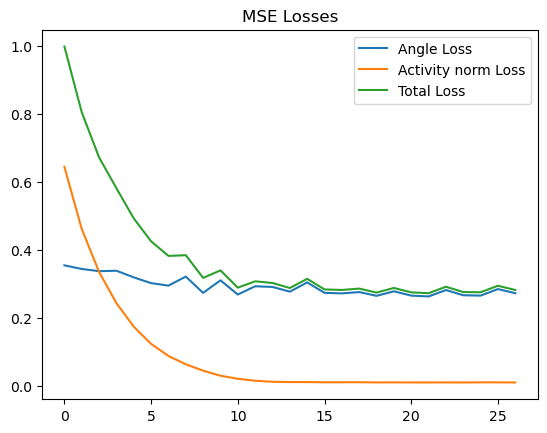

Guess on the first 15 training data:  tensor([[[0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066],
         [0.7041, 0.7066]],

        [[0.7262, 0.7148],
         [0.6968, 0.6953],
         [0.6854, 0.6878],
         [0.6881, 0.6896],
         [0.6909, 0.6914],
         [0.7034, 0.6997],
         [0.7067, 0.7019],
         [0.7046, 0.7005],
         [0.7247, 0.7138],
         [0.7122, 0.7055],
         [0.7233, 0.7129],
         [0.6934, 0.6931],
         [0.7478, 0.7291],
         [0.7002, 0.6976],
         [0.7198, 0.7106]],

        [[0.7121, 0.6989],
         [0.6957, 0.6882],
         [0.6711, 0.6720],
         [0.6988, 0.6903],
         [0.6880, 0.6832],
         [0.7

In [4]:
hidden_size = 2
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    model1 = RNN_circular_ND(input_size,t_steps,output_size,hidden_size,lr=0.0001,w_decay=0.000,act_decay=0.01,irnn=True,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=False)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(epochs=500)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

In [ ]:
_ = model1.train(epochs=1)

100%|██████████| 1/1 [00:00<00:00, 26.77it/s]


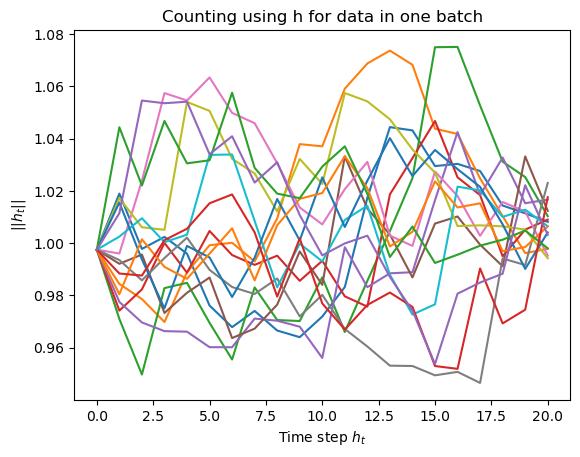

In [5]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([21, 15, 2])


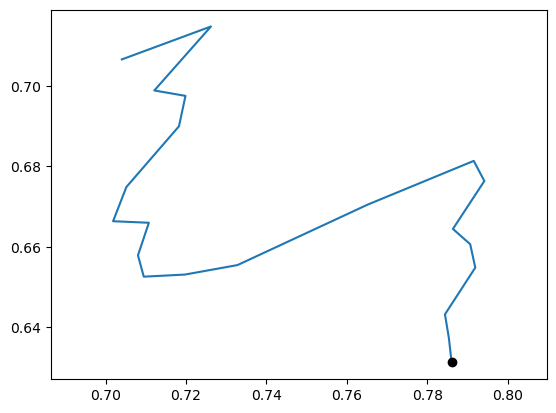

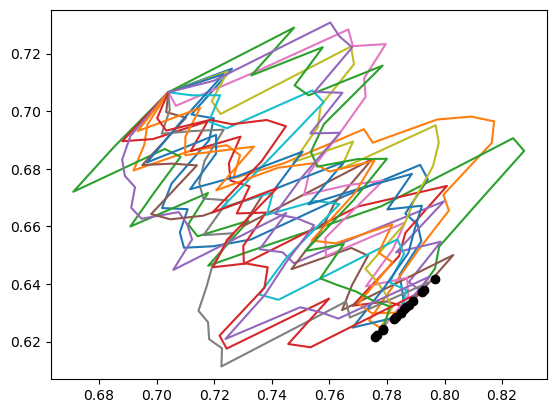

In [6]:
n = 0
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,0],hts_cric[:,n,1],"-")
plt.plot(hts_cric[-1,n,0],hts_cric[-1,n,1],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,0],hts_cric[:,:,1],"-")
plt.plot(hts_cric[-1,:,0],hts_cric[-1,:,1],"o",color="black")
plt.axis("equal")
plt.show()

In [7]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[[0.7041, 0.7066]],

        [[0.7233, 0.7129]],

        [[0.7087, 0.6966]],

        [[0.6966, 0.6822]],

        [[0.7206, 0.6918]],

        [[0.7207, 0.6853]],

        [[0.7116, 0.6729]],

        [[0.7280, 0.6774]],

        [[0.7507, 0.6860]],

        [[0.7410, 0.6730]],

        [[0.7651, 0.6824]],

        [[0.7528, 0.6676]],

        [[0.7713, 0.6734]],

        [[0.7887, 0.6783]],

        [[0.7802, 0.6659]],

        [[0.7921, 0.6672]],

        [[0.7896, 0.6588]],

        [[0.7874, 0.6508]],

        [[0.7789, 0.6385]],

        [[0.7681, 0.6249]],

        [[0.7831, 0.6284]]], grad_fn=<CopySlices>)
tensor([[[0.0792],
         [0.0144],
         [0.0184],
         [0.0875],
         [0.0421],
         [0.0243],
         [0.0730],
         [0.0857],
         [0.0240],
         [0.0886],
         [0.0192],
         [0.0782],
         [0.0766],
         [0.0271],
         [0.0662],
         [0.0385],
         [0.0390],
         [0.0263],
         [0.0211],
        

In [8]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

tensor(3.0571e-14)

[0.55996174 0.84581345 1.4366907  1.9909807  2.1801126  2.300596
 2.5735345  3.2082138  3.423512   3.7288392  4.045354   4.381796
 4.5965443  4.675043   5.1712203  5.3401213  5.629442   5.678019
 5.9168944  6.2831855 ]


(-1.097670716047287, 1.0998890817165374, -1.098818948864937, 1.090537539124489)

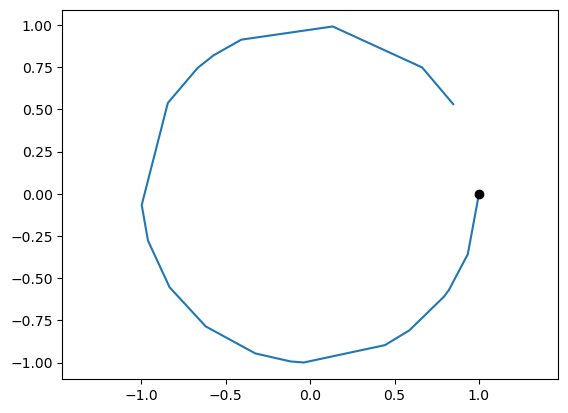

In [9]:
# Plot circle from data
data_raw = labels[91].detach().numpy()
print(data_raw)
data_points = np.zeros((t_steps,2))
for i in range(t_steps):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.axis("equal")

In [10]:
print(model1.input.weight)
print(model1.hidden.weight)
print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[0.5165],
        [0.3415]], requires_grad=True)
Parameter containing:
tensor([[ 0.9846, -0.0153],
        [-0.0148,  0.9853]], requires_grad=True)
tensor([[1., 0.],
        [0., 1.]])


In [11]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))

(21, 2)
0.5188877
0.07132625
0.108352356
0.5719823
0.2697954
0.16071254
0.4605518
0.5173771
0.17471296
0.5132
0.15825877
0.4476244
0.42795846
0.21306245
0.37638536
0.2661444
0.2697954
0.22814122
0.21489134
0.38461336


In [12]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [1.000012   0.96989936]


0.969911

Norm av input: 1.049856845928955
Norm av Wh-skalert input 1.018447620086506 ratio: 0.9700823726927676


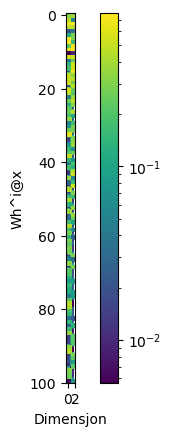

In [13]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

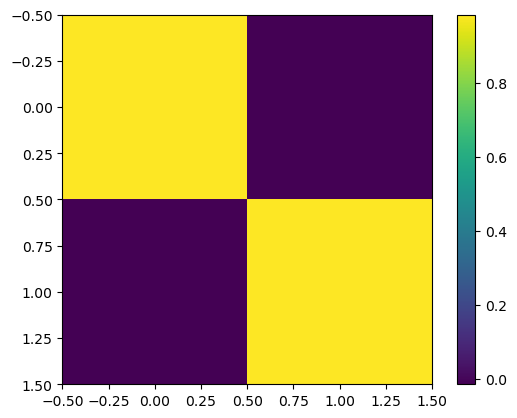

In [14]:
plt.imshow(Wh)
plt.colorbar()

In [15]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  0.61917806


In [16]:
import numpy as np
from sklearn.decomposition import PCA

# PCA of the weight matrix Wh
print(model1.hts.squeeze().T.detach().numpy())

pca = PCA(n_components=4)
pca.fit(model1.hts.T.squeeze().detach().numpy())
print("PCA variance ratio: ",pca.explained_variance_ratio_) # Variance explained by each component, the bigger the more a dimension is important
print("PCA singular values: ",pca.singular_values_)
# print("PCA components: ",pca.components_)
# print("PCA mean: ",pca.mean_)
print("PCA noise: ", pca.noise_variance_)

[[0.7040609  0.72330123 0.70870245 0.6966367  0.720645   0.72067916
  0.7116119  0.7280348  0.7507028  0.7410451  0.76507545 0.75277954
  0.77133185 0.7886783  0.78015196 0.79213446 0.7895797  0.78744495
  0.7789183  0.76805943 0.7831182 ]
 [0.70659703 0.71285975 0.696628   0.68221235 0.69177324 0.6853261
  0.67288953 0.67740756 0.6859591  0.6729908  0.6824034  0.6676404
  0.67340064 0.67825174 0.6658916  0.66718906 0.6588121  0.6507628
  0.6385332  0.6248561  0.6284303 ]]


C:\Users\matti\AppData\Local\Temp\ipykernel_15700\3037727185.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3582.)
  pca.fit(model1.hts.T.squeeze().detach().numpy())


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'